# Linear Classification

## Preamble the data set

We are using Fisher's famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris data set</a>. The goal is to classify flowers from the Iris family into one of three species, that look as follows:

<table>
<tr>
<td> <img src="figures/iris_setosa.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_versicolor.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_virginica.jpg" width="200" style="height:150px"/> </td>
</tr>

<tr> 
<td>Iris Setosa</td>
<td>Iris Versicolor</td>
<td>Iris Virginica</td>
</tr>
</table>

Our data set contains 50 flowers from each class, thus 150 in total. There are four features, the length and width of the petal (dt. Kronblatt) and sepal (dt. Kelchblatt) in centimetres.

<img src="figures/petal_sepal.jpg" width="400" style="height:300px"/>

The data set is distributed with sci-kit learn, the only thing we have to do is to important a function and call it.

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
print(type(X))
print(X.shape)

print("First three rows of data\n {}".format(X[:3]))
print("First three labels: {}".format(y[:3]))

<type 'numpy.ndarray'>
(150, 4)
First three rows of data
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
First three labels: [0 0 0]


 Not only do we get the input matrix $X \in \mathbb{R}^{150 \times 4}$ and target $y \in \mathbb{R}^{150}$, but also meta information such as what the class labels $0, 1, 2$ stand for and what the features (i.e. columns of $X$) correspond to.

In [2]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


As a first step we focus our analysis on the first two variables, the sepal length and sepal width. Since we obtain a representation of the data in two dimensions, we are able to plot it. 

In [3]:
X_2 = X[:, :2]
y_2 = y

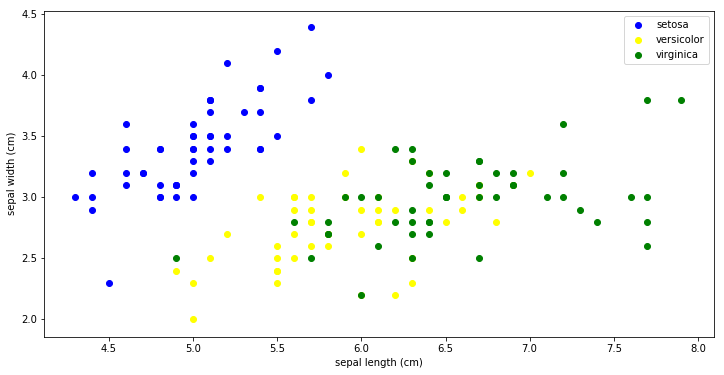

In [4]:
# Configures Jupyter to show graphics in the notebook
%matplotlib inline
import matplotlib.pyplot as plt # standard import

# We write a function so we can reuse it later.
def generate_scatter_plot(X, y):
    class_names = data.target_names
    class_colours = ['blue','yellow','green']

    fig = plt.figure(figsize=(12, 6)) # increase size of plot
    
    for i, class_colour in enumerate(class_colours):
        # plot the points only of this class label
        plt.scatter(X[y == i, 0], X[y == i, 1], c=class_colour, label=class_names[i]) 

    plt.xlabel(data.feature_names[0]) # label the axis
    plt.ylabel(data.feature_names[1])
    plt.legend(loc="best") # with legend

generate_scatter_plot(X_2, y)

## Binary Classification

We do a "setosa vs others" classification.

In [5]:
from copy import copy
y_setosa = copy(y)
y_setosa[(y == 2) | (y == 1)] = 0
y_setosa[y == 0] = 1

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_setosa, random_state=42)

In [8]:
clf = LogisticRegression(C=1, penalty="l2")
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print("Train-Score: %.4f, Test-Accuracy: %.4f" % (clf.score(X_train, y_train), clf.score(X_test, y_test)))

Train-Score: 1.0000, Test-Accuracy: 1.0000


## Multi-class Classification

Now try the multi-class problem. Look up the slides for the multi-class logistic regression.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
n_samples = X_train.shape[0]

In [24]:
clf = LogisticRegression(multi_class="multinomial", 
                         penalty="l2",
                         random_state=42,
                         solver="newton-cg")

In [25]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
clf.score(X_test, y_test)

1.0

In [34]:
from sklearn.metrics import classification_report

In [39]:
report = classification_report(y_test, 
                      clf.predict(X_test), 
                      #labels=data.feature_names,
                      target_names=data.target_names
                     )

print(report)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      1.00      1.00        11
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        38

